### delivery service quality
this analysis is supposed to explore the delivery service offered by the Frogshop empire.
It will be performed by measuring relations between datasets orders and geolocation.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap
import plotly

from preprocessing.utils import join_dataframes

In [3]:
order_customer_dataset_done = pd.read_csv('./data/processed/order_customer_dataset_done.csv', index_col=0)
geolocation_dataset_done = pd.read_csv('./data/processed/geolocation_dataset_done.csv', index_col=0)
order_items_dataset_done = pd.read_csv('./data/processed/order_items_dataset_done.csv', index_col=0)
order_payments_dataset_done = pd.read_csv('./data/processed/order_payments_dataset_done.csv', index_col=0)
order_reviews_dataset_done = pd.read_csv('./data/processed/order_reviews_dataset_done.csv', index_col=0)
orders_dataset_done = pd.read_csv('./data/processed/orders_dataset_done.csv', index_col=0)
products_dataset_done = pd.read_csv('./data/processed/products_dataset_done.csv', index_col=0)
sellers_dataset_done = pd.read_csv('./data/processed/sellers_dataset_done.csv', index_col=0)

In [10]:
order_customer_dataset_done

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


In [9]:
geolocation_dataset_done

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [8]:
orders_dataset_done

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_delivered_days,order_estimated_actual_delivered_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,-10.369433
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,-1.265324
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,-5.524803
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,-20.018819


In [12]:
order = join_dataframes(
	[orders_dataset_done, order_customer_dataset_done], 
	[{'customer_id': 'customer_id'}, {'customer_id': 'customer_id'}]
)
order

,customer_id,order_id_0,order_purchase_timestamp_0,order_approved_at_0,order_delivered_carrier_date_0,order_delivered_customer_date_0,order_estimated_delivery_date_0,order_purchase_delivered_days_0,order_estimated_actual_delivered_days_0,customer_zip_code_prefix_1,customer_city_1,customer_state_1
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,13.981296,-5.346181,6273.0,osasco,SP
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,9.386817,-9.210035,35550.0,itapecerica,MG
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,5.910486,-15.626516,29830.0,nova venecia,ES
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,28.289375,-0.162477,39664.0,mendonca,MG
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,11.276979,-4.151991,4841.0,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99435,fffcb937e9dd47a13f05ecb8290f4d3e,620ddc9fbe3e445676a8e71d4a830821,2018-03-17 00:55:27,2018-03-17 01:35:21,2018-03-17 17:58:48,2018-03-21 19:24:46,2018-04-05,4.770359,-14.191134,4917.0,sao paulo,SP
99436,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27,12.014850,-16.277211,95630.0,parobe,RS
99437,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,2018-06-29,17.185752,-20.247558,22461.0,rio de janeiro,RJ
99438,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,2018-06-13 16:57:05,2018-06-13 17:20:23,2018-06-15 18:52:00,2018-06-18 18:33:05,2018-06-25,5.066667,-6.227025,6754.0,taboao da serra,SP


In [17]:
delivery = join_dataframes(
	[geolocation_dataset_done, order], 
	[{'geolocation_zip_code_prefix': 'customer_zip_code_prefix_1'}, {'geolocation_zip_code_prefix': 'customer_zip_code_prefix_1'}]
)
delivery

,customer_zip_code_prefix_1,geolocation_lat_0,geolocation_lng_0,geolocation_city_0,geolocation_state_0,customer_id_1,order_id_0_1,order_purchase_timestamp_0_1,order_approved_at_0_1,order_delivered_carrier_date_0_1,order_delivered_customer_date_0_1,order_estimated_delivery_date_0_1,order_purchase_delivered_days_0_1,order_estimated_actual_delivered_days_0_1,customer_city_1_1,customer_state_1_1
2,1003.0,-23.549000,-46.635582,sao paulo,SP,7ae2a9337aa4bc799723511faa1d6830,d454d6650d375ebc3f9667a4d2fe161c,2018-05-10 09:12:16,2018-05-10 09:35:13,2018-05-10 09:11:00,2018-05-11 18:58:28,2018-05-23,1.407083,-11.209398,sao paulo,SP
3,1004.0,-23.549829,-46.634792,sao paulo,SP,a09edf8c1e842e94805a206b3d73eed5,3fe4ba391eeff167bfdda2c590013b02,2017-04-16 17:17:57,2017-04-16 17:30:15,2017-04-18 15:59:01,2017-04-20 08:22:49,2017-05-09,2.391319,-14.511719,sao paulo,SP
4,1005.0,-23.549547,-46.636406,sao paulo,SP,15d7dbcd027b5b24866db33e2b819021,08cae26133a5501cdf7b13db6bcf39e6,2018-01-30 14:58:10,2018-01-30 15:11:27,2018-01-31 23:08:38,2018-02-05 15:16:59,2018-02-21,5.547589,-13.344161,sao paulo,SP
5,1006.0,-23.550127,-46.636044,sao paulo,SP,467bcdf6e97d661f3947ad9308dcb0cc,dbb7f86dc307d8ecb2cef71947ffb5df,2017-08-22 09:29:59,2017-08-22 09:46:08,2017-08-22 19:57:26,2017-08-23 14:51:52,2017-09-04,6.215671,-14.321435,sao paulo,SP
6,1007.0,-23.549962,-46.637204,sao paulo,SP,59ba19787a301a48bee9f11ee4dc8a4e,76c534dbb4c5ca67809898e7426097b5,2017-12-22 09:59:43,2017-12-22 10:10:59,2017-12-22 21:49:56,2017-12-28 14:59:21,2018-01-18,5.041169,-10.602109,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17159,99955.0,-28.112176,-52.144629,vila langaro,RS,62cedeefcf7566f584f0c424138b5247,06cc571b0a86a28fa19139270e4d3aea,2017-11-25 09:56:09,2017-11-25 10:14:40,2017-11-30 16:38:42,2017-12-11 22:05:08,2017-12-28,18.227357,-14.525586,vila langaro,RS
17160,99960.0,-27.953722,-52.025511,charrua,RS,2c07700e1621617464d6252aaca9f1a6,a79a0a215a517931d571bb293a2f1379,2017-11-14 06:53:00,2017-11-15 03:06:35,2017-11-16 18:46:56,2017-11-27 14:50:21,2017-12-14,13.331493,-16.381701,charrua,RS
17161,99965.0,-28.183372,-52.039850,agua santa,RS,235702411e5214f0e4a0761bf5ce9e99,3363e330c754a732795f39079bb76d55,2017-07-23 20:44:17,2017-07-23 20:55:18,2017-07-24 16:57:55,2017-08-02 17:15:06,2017-08-17,13.022002,-13.293819,agua santa,RS
17162,99970.0,-28.343920,-51.874988,ciriaco,RS,3ab8bc00f8740d54afc4c771fb6c7f69,a07b4171d5e4ccbc057d6321244933cb,2017-12-28 09:04:50,2017-12-29 02:09:23,2018-01-02 19:42:32,2018-01-15 18:12:41,2018-01-23,18.380451,-7.241192,ciriaco,RS


In [18]:
delivery.isna().sum()

customer_zip_code_prefix_1                   0
geolocation_lat_0                            0
geolocation_lng_0                            0
geolocation_city_0                           0
geolocation_state_0                          0
customer_id_1                                0
order_id_0_1                                 0
order_purchase_timestamp_0_1                 0
order_approved_at_0_1                        0
order_delivered_carrier_date_0_1             0
order_delivered_customer_date_0_1            0
order_estimated_delivery_date_0_1            0
order_purchase_delivered_days_0_1            0
order_estimated_actual_delivered_days_0_1    0
customer_city_1_1                            0
customer_state_1_1                           0
dtype: int64

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

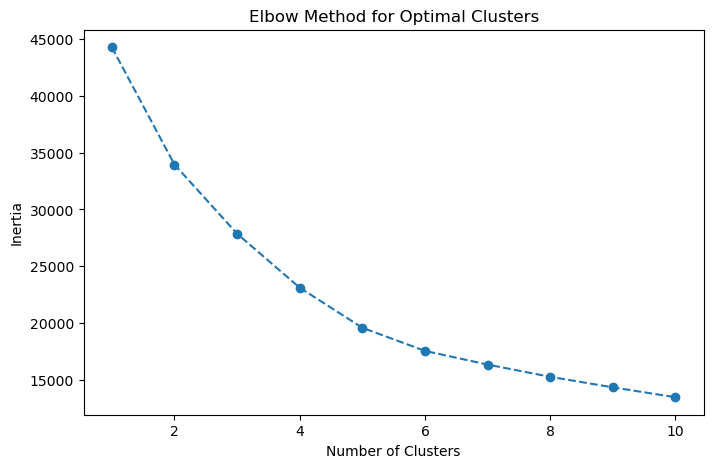

In [34]:
numeric_features = [
    'geolocation_lat_0',
    'geolocation_lng_0',
    'order_estimated_actual_delivered_days_0_1',
    'order_purchase_delivered_days_0_1'
]

data = delivery[numeric_features]
scaler = StandardScaler()
delivery_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2137)
    kmeans.fit(delivery_scaled)
    inertia.append(kmeans.inertia_)

# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

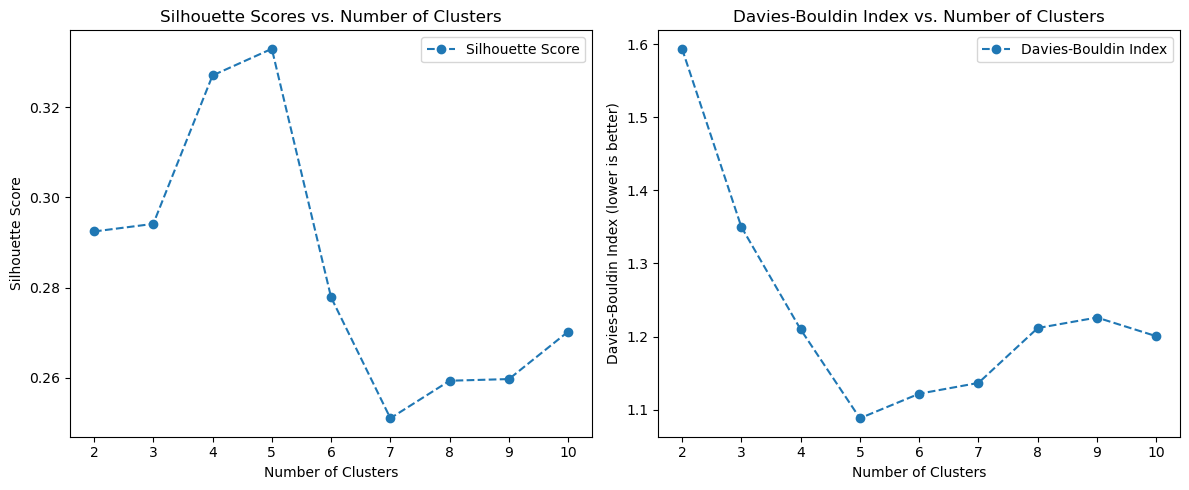

In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_clusters(data, max_clusters=10):
    silhouette_scores = []
    davies_bouldin_scores = []
    for k in range(2, max_clusters + 1):  # we start with two clusters
        kmeans = KMeans(n_clusters=k, random_state=37)
        clusters = kmeans.fit_predict(data)
        
        # Silhouette Score
        silhouette_avg = silhouette_score(data, clusters)
        silhouette_scores.append(silhouette_avg)
        
        # Davies-Bouldin Index
        db_score = davies_bouldin_score(data, clusters)
        davies_bouldin_scores.append(db_score)
    
    return silhouette_scores, davies_bouldin_scores

# Evaluate 
silhouette_scores, davies_bouldin_scores = evaluate_clusters(delivery_scaled, max_clusters=10)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index (lower is better)')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=12)
clusters = kmeans.fit_predict(delivery_scaled)

#cluster labels for the original dataset
delivery['Cluster'] = clusters

# cluster characteristics
cluster_summary = delivery.groupby('Cluster')[numeric_features].mean()
print(cluster_summary)

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         geolocation_lat_0  geolocation_lng_0  \
Cluster                                         
0               -20.972604         -43.239273   
1               -23.275421         -46.894850   
2               -22.391058         -45.995499   
3               -25.393403         -51.216200   
4               -16.832989         -49.290170   

         order_estimated_actual_delivered_days_0_1  \
Cluster                                              
0                                       -13.832264   
1                                       -10.688933   
2                                        -4.477273   
3                                       -13.276605   
4                                       -12.564055   

         order_purchase_delivered_days_0_1  
Cluster                                     
0                                11.818198  
1                                 7.410981  
2                                16.876233  
3                                12.311545  
4      

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



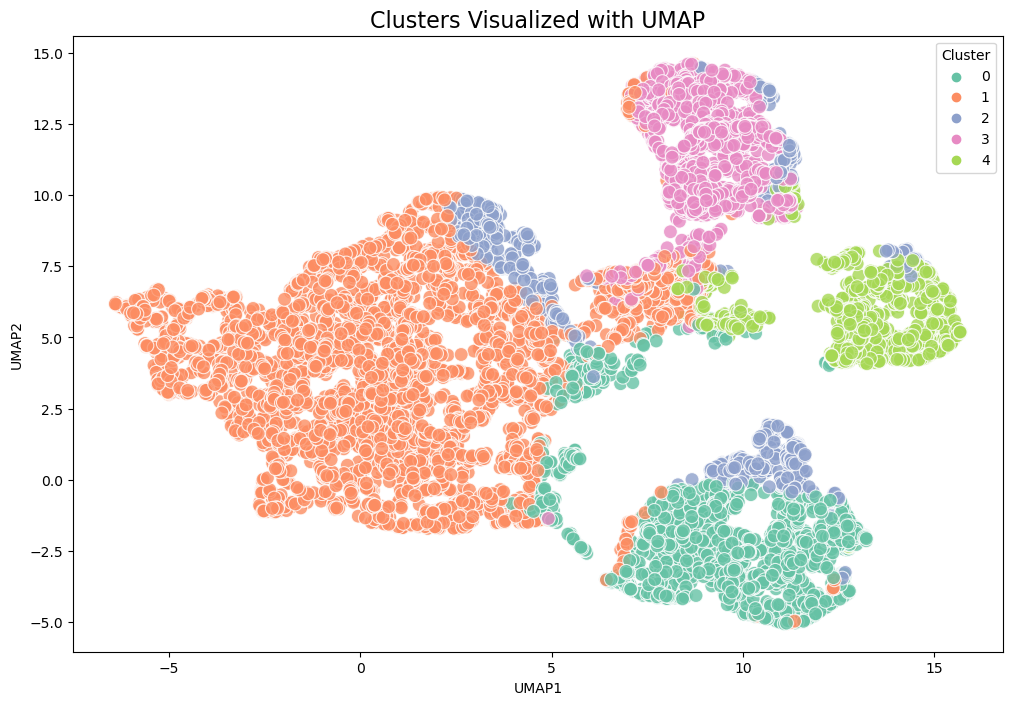

In [37]:
umap_reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
umap_embedding = umap_reducer.fit_transform(delivery_scaled)

umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = clusters

# UMAP projection with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='Cluster', data=umap_df, palette='Set2', s=100, alpha=0.8
)
plt.title('Clusters Visualized with UMAP', fontsize=16)
plt.legend(title='Cluster', loc='best')
plt.show()

In [38]:
umap_reducer_3d = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1, n_components=3)
umap_embedding_3d = umap_reducer_3d.fit_transform(delivery_scaled)
# Plotly for 3D visualization
import plotly.express as px
umap_df_3d = pd.DataFrame(umap_embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df_3d['Cluster'] = clusters
fig = px.scatter_3d(umap_df_3d, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster')
fig.update_traces(marker=dict(size=5))
fig.show()


c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



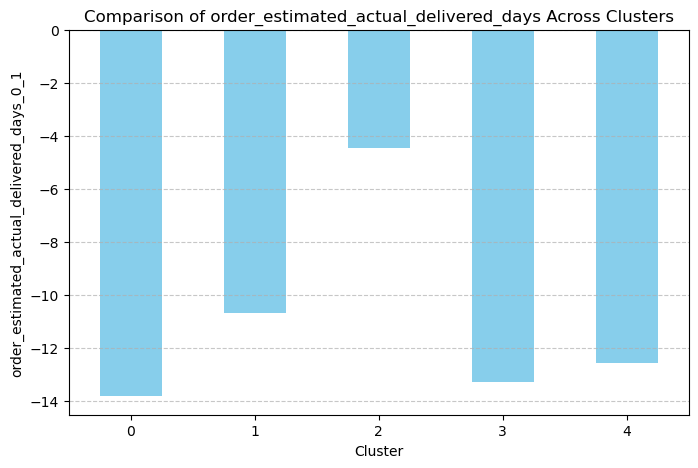

In [39]:
cluster_means = delivery.groupby('Cluster')['order_estimated_actual_delivered_days_0_1'].mean()
    
plt.figure(figsize=(8, 5))
cluster_means.plot(kind='bar', color='skyblue')
plt.title(f'Comparison of order_estimated_actual_delivered_days Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('order_estimated_actual_delivered_days_0_1')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


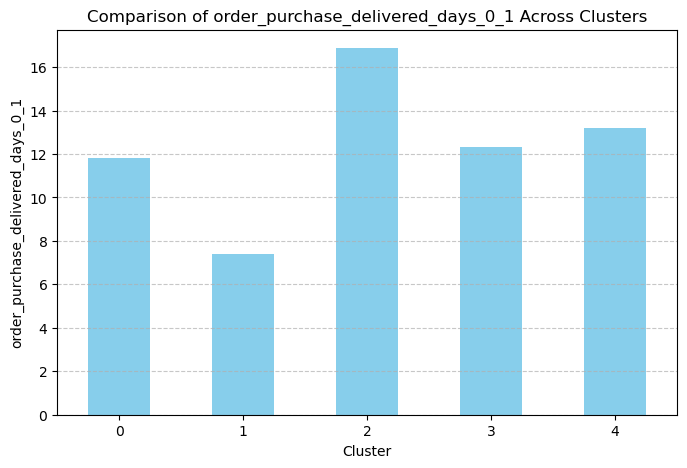

In [40]:
cluster_means = delivery.groupby('Cluster')['order_purchase_delivered_days_0_1'].mean()
    
plt.figure(figsize=(8, 5))
cluster_means.plot(kind='bar', color='skyblue')
plt.title(f'Comparison of order_purchase_delivered_days_0_1 Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('order_purchase_delivered_days_0_1')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# conclusions related to delivery service
## cluter breakdown:
Cluster 0:
Geographic Location: Centered around latitude -20.97 and longitude -43.24, indicating a southeastern region in Brazil.
Delivery Performance:
Estimated vs. Actual Delivery Difference: -13.83 days (earlier than expected).
Purchase to Delivery Time: 11.82 days.
Insights: This cluster shows a high efficiency in delivering earlier than expected, with a moderate total delivery time.

Cluster 1:
Geographic Location: Latitude -23.28, longitude -46.89, corresponding to the São Paulo area.
Delivery Performance:
Estimated vs. Actual Delivery Difference: -10.69 days (earlier than expected).
Purchase to Delivery Time: 7.41 days (shortest delivery time across clusters).
Insights: São Paulo customers experience the fastest delivery times overall, though the difference between estimated and actual delivery is less significant.

Cluster 2:
Geographic Location: Latitude -22.39, longitude -45.99, a central southeastern region.
Delivery Performance:
Estimated vs. Actual Delivery Difference: -4.48 days (smallest "early delivery" margin).
Purchase to Delivery Time: 16.88 days (longest delivery time across clusters).
Insights: This cluster faces slower delivery times with less deviation from estimated dates, suggesting potential inefficiencies in logistics.

Cluster 3:
Geographic Location: Latitude -25.39, longitude -51.22, indicating a southern region.
Delivery Performance:
Estimated vs. Actual Delivery Difference: -13.28 days (significant early delivery).
Purchase to Delivery Time: 12.31 days.
Insights: Southern regions demonstrate consistent delivery ahead of schedule, with slightly longer overall delivery times compared to Cluster 1.

Cluster 4:
Geographic Location: Latitude -16.83, longitude -49.29, representing a central-western region.
Delivery Performance:
Estimated vs. Actual Delivery Difference: -12.56 days (early delivery).
Purchase to Delivery Time: 13.18 days.
Insights: Central-western customers see efficient deliveries similar to Cluster 0 but with slightly longer overall timelines.


# potential improvements in Frogshop delivery strategies
1) Focus on improving delivery processes for Cluster 2, which has the longest purchase-to-delivery times.
2) Highlight the reliability of early deliveries in marketing campaigns for regions like Cluster 1.
3) Address customer concerns in regions with slower delivery times by providing more accurate delivery estimates.